Single-variable linear regression using Tensorflow 

Using the immigrant skills and salaries dataset sourced from the UFL website.

Description - http://users.stat.ufl.edu/~winner/data/immwork.txt

Data - http://users.stat.ufl.edu/~winner/data/immwork.dat

The dataset is manually split into a training set and a test set. 

The feature used (X) is '% speak English' (column 3) and the output (Y) is average weekly salary (column 2)

Inspired by the code in https://github.com/aymericdamien/TensorFlow-Examples/blob/master/examples/2_BasicModels/linear_regression.py

and https://medium.com/all-of-us-are-belong-to-machines/the-gentlest-introduction-to-tensorflow-248dc871a224

In [125]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [126]:
learning_rate = 0.0025 # TODO: figure out role of learning rate and how it affects convergence
num_epochs = 15000
progress_step = 1000

In [127]:
# Training set
# percent that speak English 
engper_train = np.asarray([54.9,66.0,20.3,79.4,100.0,50.9,96.5,86.1,100.0,50.3,45.6,68.6,87.5,33.5,74.7,79.5,100.0,58.8,48.7,51.3,21.1,46.4,96.9,43.5,45.2])
# average weekly salary
sal_train = np.asarray([9.73,13.07,10.31,10.62,14.15,11.37,14.32,12.04,14.13,13.27,11.07,12.92,13.63,8.41,12.71,14.37,13.01,11.28,9.61,11.03,8.95,11.65,15.28,11.06,8.10])

num_training_samples = engper_train.shape[0]

# Test set
engper_test = np.asarray([33.3,43.6,36.8,100.0,41.2,55.6,51.7,94.7,54.6,22.5])
sal_test = np.asarray([10.90,11.01,9.92,15.24,10.75,11.95,12.15,15.36,8.12,7.65])

num_test_samples = engper_test.shape[0]

In [128]:
# create placeholders for X and Y - this allows input data to be fed in.
# use matrices to represent X and Y
# X has 1 column representing the % speaking English, None implies the number of rows is unknown.
X = tf.placeholder(tf.float32, [None, 1])
# Y has 1 column representing the average weekly salary, None implies the numbe of rows is unknown.
Y = tf.placeholder(tf.float32, [None, 1])

# create variables for weight and bias - these are trainable by default and change during the training.
# The weight has 1 feature and 1 output
W = tf.Variable(tf.zeros([1,1]), name="weight")
b = tf.Variable(tf.zeros([1]), name="bias")

In [129]:
# the predicted value is W.x + b
# the order for matmul is X. W since X has shape (?, 1) and W has shape (1, 1)
pred = tf.matmul(X, W) + b

In [130]:
# estimate the cost - mean-squared error
cost = tf.reduce_sum(tf.pow(pred-Y, 2))/(2*num_training_samples)

In [131]:
# use a Gradient descent optimizer that minimizes the cost.
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

In [132]:
# define the init operation
init = tf.global_variables_initializer()

epoch: 0, cost: 4.598212, W: 0.178252, b: 0.005211
epoch: 1000, cost: 2.740721, W: 0.146555, b: 2.126172
epoch: 2000, cost: 1.768161, W: 0.123615, b: 3.661180
epoch: 3000, cost: 1.259011, W: 0.107012, b: 4.772125
epoch: 4000, cost: 0.992506, W: 0.094995, b: 5.576202
epoch: 5000, cost: 0.853066, W: 0.086299, b: 6.158102
epoch: 6000, cost: 0.780136, W: 0.080005, b: 6.579223
epoch: 7000, cost: 0.742003, W: 0.075449, b: 6.884064
epoch: 8000, cost: 0.722093, W: 0.072154, b: 7.104583
epoch: 9000, cost: 0.711698, W: 0.069767, b: 7.264263
epoch: 10000, cost: 0.706274, W: 0.068037, b: 7.380020
epoch: 11000, cost: 0.703462, W: 0.066789, b: 7.463570
epoch: 12000, cost: 0.702010, W: 0.065889, b: 7.523752
epoch: 13000, cost: 0.701253, W: 0.065232, b: 7.567696
epoch: 14000, cost: 0.700869, W: 0.064763, b: 7.599122
Training complete: c=0.700670


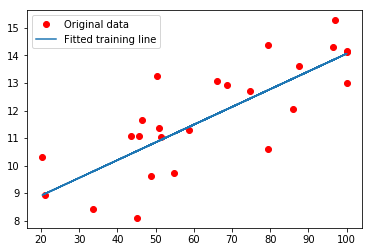

test cost=0.952021
cost diff=0.251351


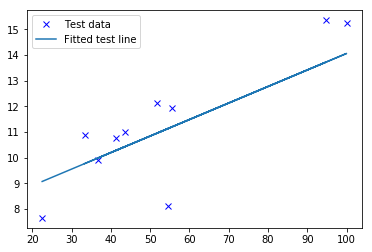

In [133]:
# start up a session and run the operations
with tf.Session() as sess:
    sess.run(init)
    
    # in this case, epoch is basically same as the step since batch size is 1.
    for epoch in range(num_epochs):
        for (x, y) in zip(engper_train, sal_train): 
            # x and y as read are scalars. They need to be converted into numpy arrays of the correct shape
            # (in this case, 1 row and 1 column i.e. [1,1]).
            sess.run(optimizer, feed_dict={X: np.asarray([[x]]), Y:np.asarray([[y]])})

        # Output progress
        if epoch%progress_step == 0:
            # again, the training data needs to be reshaped to (?, 1) to match the placeholder shapes. 
            c = sess.run(cost, feed_dict={X: np.reshape(engper_train, (-1, 1)),
                                          Y: np.reshape(sal_train, (-1, 1))})
            print('epoch: %d, cost: %f, W: %f, b: %f' % (epoch, c, sess.run(W), sess.run(b)))
    
    training_cost = sess.run(cost, feed_dict={X: np.reshape(engper_train, (-1,1)), 
                                              Y: np.reshape(sal_train, (-1, 1))})
    print 'Training complete: c=%f' % training_cost
    
    # Plot the trained data
    plt.plot(engper_train, sal_train, 'ro', label='Original data')
    # reshape the predicted value into a simple array so that it can be plotted.
    # -1 indicates that the number of elements will be inferred automatically.
    y = np.reshape(sess.run(W) * engper_train + sess.run(b), -1)
    plt.plot(engper_train, y, label='Fitted training line')
    plt.legend()
    plt.show()
    
    tcost = tf.reduce_sum(tf.pow(pred-Y, 2))/(2*num_test_samples)
    test_cost = sess.run(tcost, feed_dict={X: np.reshape(engper_test, (-1, 1)), 
                                           Y: np.reshape(sal_test, (-1, 1))})
    print('test cost=%f' % test_cost)
    print('cost diff=%f' % abs(test_cost - training_cost))
    
    # Plot the test data
    plt.plot(engper_test, sal_test, 'bx', label='Test data')
    # reshape the predicted value into a simple array so that it can be plotted.
    test_y = np.reshape(sess.run(W) * engper_test + sess.run(b), -1)
    plt.plot(engper_test, test_y , label='Fitted test line')
    plt.legend()
    plt.show()